In [1]:
include("../CdaOpt/src/cdaopt.jl")
include("../CdaOpt/data_utils/data_utils.jl")
using .CdaOpt
using .DataUtils

In [ ]:
CATALOG_DIR = abspath("./data/catalog")
TIME_HISTORY = abspath("./data/targets/time_history1.txt")

In [2]:
x0 = DataUtils.loadicdir(CATALOG_DIR, ordering=[4,3,1,2,5,6])
#-------------------------------------------------------------------- ICs
~, target, tstep = DataUtils.loadtarget(TIME_HISTORY)
#-------------------------------------------------------------------- target points
tspan = collect(0:tstep:6.45);
#-------------------------------------------------------------------- time span
T = length(tspan)
P = size(target,1)
J = size(x0, 1)
#-------------------------------------------------------------------- T, P, J
m = SdaProblem.getcoveragerequirement(16, P, T)
#-------------------------------------------------------------------- coverage requirement
gravitymodel = R3BP.CR3BP(1.215058560962404e-02,384400.0, 3.751902619517228e+05, 7.0 )
#-------------------------------------------------------------------- gravity model
apmag_params = Base.ImmutableDict(
"ws" => - 0.9253018261815922,#--------------- angular velocity of sun
"AU" => 1.496e8 / gravitymodel.lstar,#------- 1AU in distance units
"ms" => -26.74,#----------------------------- apparent magnitude of sun
"aspec" => 0,#------------------------------- specular reflection coefficient
"adiff" => 0.2,#----------------------------- diffuse reflection coefficient
"d" => 0.001 / gravitymodel.lstar,#---------- diameter of target in distance units
"rmoon" => 1737.4 / gravitymodel.lstar,#----- radius of moon in DU
"rearth" => 6371 / gravitymodel.lstar#------- radius of earth in DU
)
#-------------------------------------------------------------------- illumination parameters
params = Base.ImmutableDict(
    "dynamics" => R3BP.asdict(gravitymodel),
    "apmag"    => apmag_params
)
#-------------------------------------------------------------------- aggregrated params
access_metric = AccessMetrics.apparentmag
#-------------------------------------------------------------------- access metric


apparentmag (generic function with 1 method)

In [3]:
p = SdaProblem.problem(x0, target, tspan, params, m, access_metric, gravitymodel)
access_measure, orbits = CdaOpt.precompute(p)
phased = CdaOpt.phase(access_measure)
V = CdaOpt.threshold(phased, 17.0)

153436×2586 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 ⋮              ⋮              ⋮        ⋱     ⋮              ⋮              ⋮
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  

In [4]:
result = CdaOpt.optimize(V, m)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-20
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 153436 rows, 2586 columns and 129018557 nonzeros
Model fingerprint: 0xeb617951
Variable types: 0 continuous, 2586 integer (2586 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 14.0000000
Presolve removed 0 rows and 0 columns (presolve time = 9s) ...
Presolve removed 0 rows and 0 columns (presolve time = 11s) ...
Presolve removed 0 rows and 0 columns (presolve time = 22s) ...
Presolve removed 147740 rows and 0 columns (presolve time = 32s) ...
Presolve removed 147740 rows and 173 columns (presolve time = 47s) ...
Presolve removed 147740 rows and 173 columns (pre

A JuMP Model
Minimization problem with:
Variables: 2586
Objective function type: JuMP.AffExpr
`JuMP.AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 153436 constraints
`JuMP.VariableRef`-in-`MathOptInterface.ZeroOne`: 2586 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Gurobi
Names registered in the model: x

In [5]:
arr, arr_tar, mat_phased = CdaOpt.postprocessing2(p, result, V, phased)

([0.016853932584269662 0.9410112359550562 … 0.0 0.9297752808988764; 0.011235955056179775 0.9410112359550562 … 0.0 0.9297752808988764; … ; 0.03089887640449438 0.9353932584269663 … 0.0 0.9297752808988764; 0.02247191011235955 0.9382022471910112 … 0.0 0.9297752808988764], [3.0 3.0 … 1.0 1.0; 3.0 3.0 … 1.0 1.0; … ; 3.0 3.0 … 1.0 1.0; 3.0 3.0 … 1.0 1.0], [18.84500146050298 15.969445736343925 … 19.71789147649974 16.60984302479491; 18.9339778657432 16.045631855813678 … 19.72058769645069 16.637272383347476; … ; 18.640028912731932 15.82171037301175 … 19.712263688417632 16.552220102355133; 18.74744148818598 15.89481644141561 … 19.71511581570125 16.58150057224815;;; 18.846810422998804 15.976151909963956 … 19.71778882094956 16.621062225798877; 18.935974652769648 16.051679477440896 … 19.720490667000544 16.64835463082827; … ; 18.64144578881263 15.829866108330574 … 19.712148458358865 16.56372029862587; 18.749055284277855 15.902225218681952 … 19.715007101802325 16.592859060315742;;; 18.848675484739456 

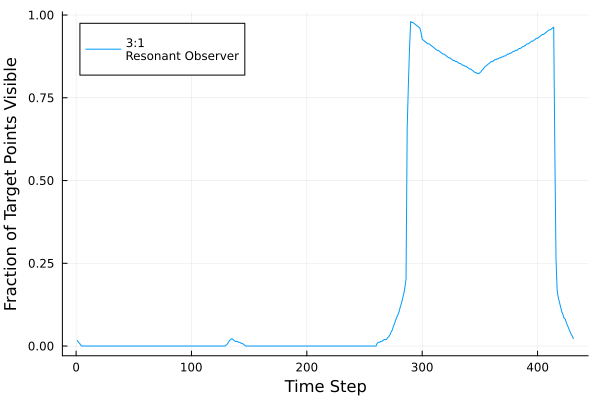

In [6]:
using Plots

xs = collect(1:431)

# We put labels in a row vector: applies to each series
labels = "3:1\nResonant Observer"

# # Marker shapes in a column vector: applies to data points
# markershapes = [:circle, :star5]

# # Marker colors in a matrix: applies to series and data points
# markercolors = [
#     :green :orange :black :purple
#     :red   :yellow :brown :white
# ]

plot(
    xs,
    arr[:, 1],
    label = labels,
    xlabel = "Time Step",
    ylabel= "Fraction of Target Points Visible"
    # shape = markershapes,
    # color = markercolors,
    # markersize = 10
)

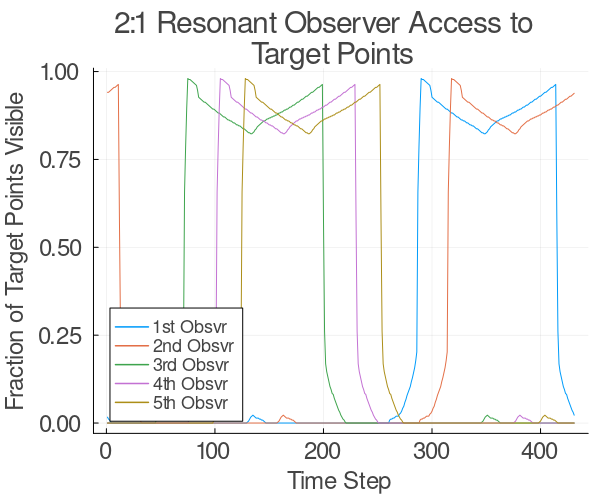

In [7]:
labels = ["1st Obsvr" "2nd Obsvr" "3rd Obsvr" "4th Obsvr" "5th Obsvr"]
plot(
    xs,
    arr[:, 1:5],
    labels=labels,
    legend=:bottomleft,
    legendfont=font(12, "Helvetica"),
    xlabel = "Time Step",
    ylabel= "Fraction of Target Points Visible",
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    title = "2:1 Resonant Observer Access to\nTarget Points",
    titlefont=font(20,"Helvetica"),
    # shape = markershapes,
)
plot!(size= (600, 500))
# png("2:1ResonantObsAcc")

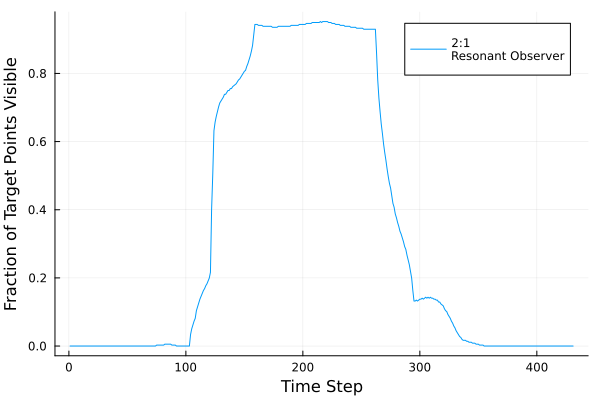

In [8]:
labels = "2:1\nResonant Observer"
plot(
    xs,
    arr[:, [7]],
    label = labels,
    xlabel = "Time Step",
    ylabel= "Fraction of Target Points Visible"
    # shape = markershapes,
    # color = markercolors,
    # markersize = 10
)

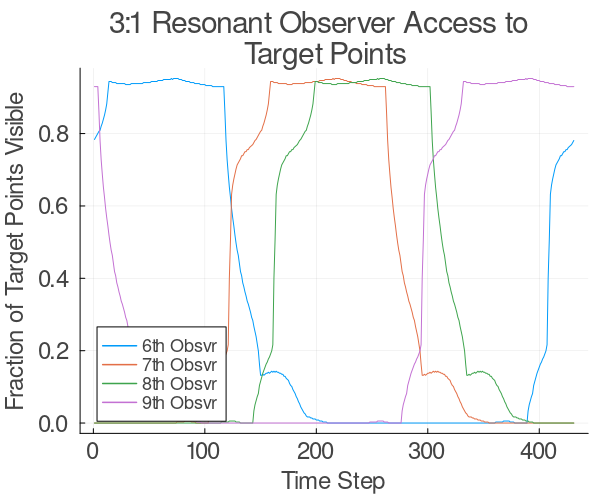

In [8]:
labels = ["6th Obsvr" "7th Obsvr" "8th Obsvr" "9th Obsvr"]
plot(
    xs,
    arr[:, 6:9],
    labels=labels,
    legend=:bottomleft,
    legendfont=font(12, "Helvetica"),
    xlabel = "Time Step",
    ylabel= "Fraction of Target Points Visible",
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    title = "3:1 Resonant Observer Access to\nTarget Points",
    titlefont=font(20,"Helvetica"),
    # shape = markershapes,
)
plot!(size= (600, 500))
# png("3:1ResonantObsAcc")

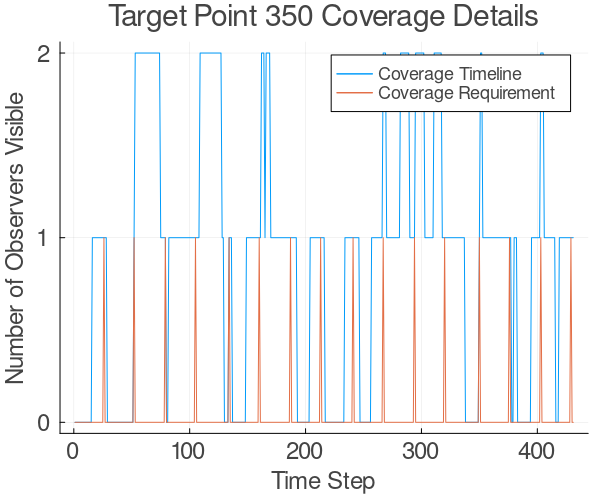

In [9]:
labels = ["Coverage Timeline" "Coverage Requirement"]
plot(
    xs,
    [arr_tar[:, 350], reshape(m, T, P)[:, 350]],
    labels=labels,
    # legend=:bottomleft,
    xlabel = "Time Step",
    ylabel= "Number of Observers Visible",
    title = "Target Point 350 Coverage Details",
    titlefont=font(20,"Helvetica"),
    legendfont=font(12, "Helvetica"),
    ytick = collect(0:maximum(arr_tar[:, 350])),
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    # ylims=(0, Inf)
    # shape = markershapes,
)
plot!(size= (600, 500))
# png("tp350_cover_details")

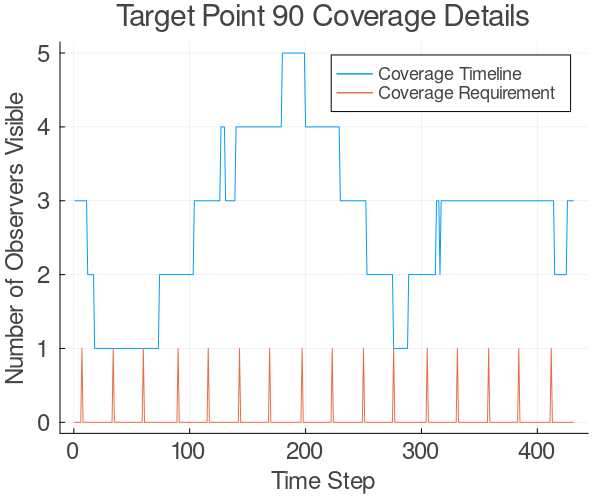

In [10]:
labels = ["Coverage Timeline" "Coverage Requirement"]
plot(
    xs,
    [arr_tar[:, 90], reshape(m, T, P)[:, 90]],
    labels=labels,
    # legend=:bottomleft,
    xlabel = "Time Step",
    ylabel= "Number of Observers Visible",
    title = "Target Point 90 Coverage Details",
    titlefont=font(20,"Helvetica"),
    legendfont=font(12, "Helvetica"),
    ytick = collect(0:maximum(arr_tar[:, 90])),
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    # ylims=(0, Inf)
    # shape = markershapes,
)
plot!(size= (600, 500))
# png("tp90_cover_details")

In [95]:
labels = ["TP 90" "TP 350"]
pl1 = plot(
    xs,
    mat_phased[:, 4, [90, 350]],
    labels=labels,
    # legend=:bottomleft,
    xlabel = "Time Step",
    ylabel= "Apparent Magnitude",
    title = "Target Apparent Magnitude to one of the\n3:1 Resonant Observers ",
    titlefont=font(20,"Helvetica"),
    legendfont=font(12, "Helvetica"),
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    # ylims=(0, Inf)
    # shape = markershapes,
)
vline!(findall(y->y>0.99, reshape(m, T, P)[:, 90])[[ 5, 6, 7, 8, 9]], linestyle=:dashdot, labels = "Cov Req TP 90")
vline!(findall(y->y>0.99, reshape(m, T, P)[:, 350])[[9]], linestyle=:dashdotdot, labels = "Cov Req TP 350")
hspan!([ylims(pl1)[1], 17]; label = "visible magnitudes", alpha=0.2, color="green")
plot!(size= (600, 500))
png("3:1Apmag")

"3:1Apmag.png"

In [94]:
labels = ["TP 90" "TP 350"]
pl = plot(
    xs,
    [mat_phased[:, 6, [90, 350]]],
    labels=labels,
    # legend=:bottomleft,
    xlabel = "Time Step",
    ylabel= "Apparent Magnitude",
    title = "Target Apparent Magnitude to one of the\n2:1 Resonant Observers ",
    titlefont=font(20,"Helvetica"),
    legendfont=font(12, "Helvetica"),
    ytickfont=font(16, "Helvetica"),
    xtickfont=font(16, "Helvetica"),
    xguidefont=font(16, "Helvetica"),
    yguidefont=font(16, "Helvetica"),
    # ylims=(0, Inf)
    # shape = markershapes,
)
# hline!([17.0], labels="Cutoff", linestyle=:dash)
vline!(findall(y->y>0.99, reshape(m, T, P)[:, 90])[[1, 2, 3, 4, 5]], linestyle=:dashdot, labels = "Cov Req TP 90")
vline!(findall(y->y>0.99, reshape(m, T, P)[:, 350])[[7, 15]], linestyle=:dashdotdot, labels = "Cov Req TP 350")
hspan!([ylims(pl)[1], 17]; label = "visible magnitudes", alpha=0.2, color="green")
plot!(size= (600, 500))

png("2:1ApMag")

"2:1ApMag.png"